<a href="https://colab.research.google.com/github/ajiyamoiz/SE-807-Machine-Learning-Course/blob/main/ML0_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
from mpl_toolkits import mplot3d
import glob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# PATH = 'virtual.csv'

count = 0
combined = pd.DataFrame()
for filename in os.listdir("2011_09_26/2011_09_26_drive_0001_sync/oxts/data/*"):
   with open(os.path.join("2011_09_26/2011_09_26_drive_0001_sync/oxts/data/*", filename), 'r') as f:
     df=pd.read_csv(f, sep=" ", names= ['Latitude', 'Longitude','alt','roll4','pitch5','yaw6','vn7','ve8','vf9','vl10',
                                         'vu11','ax12','ay13','ay14','af15','al16','au17','wx18','wy19','wz20','wf21','wl22',
                                         'wu23','pos_accuracy24','vel_accuracy25','navstat26','numsats27','posmode28','velmode29','orimode30'])
     combined = combined.append(df, ignore_index=True)
     count = count+1     
print(count)     
combined



FileNotFoundError: ignored

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.999)

In [ ]:
data = combined.values[:,0:2]
k5 = pca.fit_transform(data)

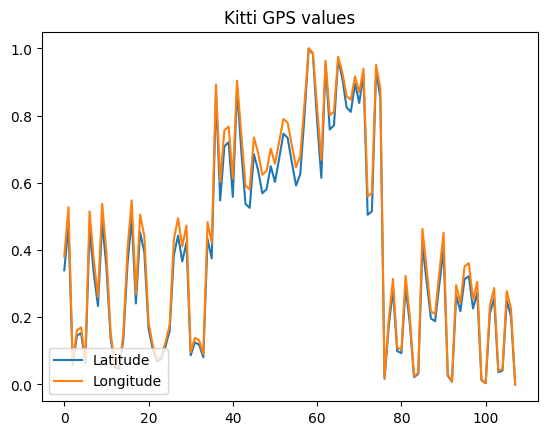

In [ ]:
sc1 = MinMaxScaler()

plt.title('Kitti GPS values')
plt.plot(sc1.fit_transform(combined['Latitude'].values.reshape(-1,1)), label = 'Latitude')
plt.plot(sc1.fit_transform(combined['Longitude'].values.reshape(-1,1)), label = 'Longitude')
plt.legend(loc= 'lower left')


In [ ]:
virtual =pd.read_csv(PATH, sep=",", names= ['Latitude', 'Longitude'])

In [ ]:
real_world_dataset = pd.read_csv("Book1.csv")

sc2 = MinMaxScaler()
lats = sc2.fit_transform(real_world_dataset.values[:,0].reshape(-1,1))
lat_new = []
for i in range(0,len(lats),100):
    lat_new.append(lats[i])


sc3 = MinMaxScaler()
long = sc3.fit_transform(real_world_dataset.values[:,1].reshape(-1,1))
long_new = []
for i in range(0,len(long),100):
    long_new.append(long[i])

1060

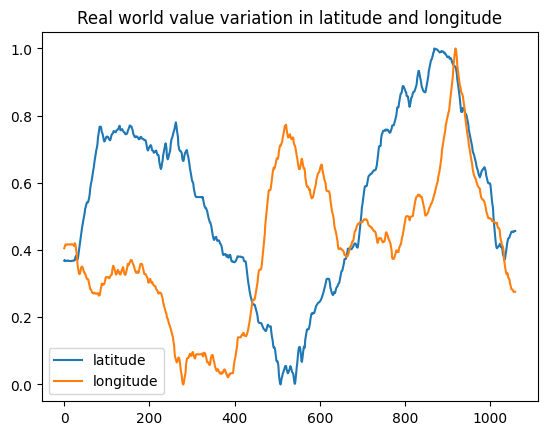

In [ ]:
plt.plot(lat_new, label = 'latitude')
plt.plot(long_new, label = 'longitude')
plt.legend(loc="lower left")
plt.title("Real world value variation in latitude and longitude")
len(lat_new)

In [ ]:
sc2 = MinMaxScaler()
#lats_sim = sc2.fit_transform(virtual_data_array[:,0].reshape(-1,1))
lats_sim = virtual.values[:,0].reshape(-1,1)
lats_sim_arr = []
for i in range(0,len(lats_sim),2):
    lats_sim_arr.append(lats_sim[i])
lats_sim_arr = sc2.fit_transform(lats_sim_arr)

sc3 = MinMaxScaler()
#long_sim = sc3.fit_transform(virtual.values[:,1].reshape(-1,1))
long_sim = virtual.values[:,1].reshape(-1,1)
long_sim_arr = []
for i in range(0,len(long_sim),2):
    long_sim_arr.append(long_sim[i])

long_sim_arr = sc3.fit_transform(long_sim_arr)

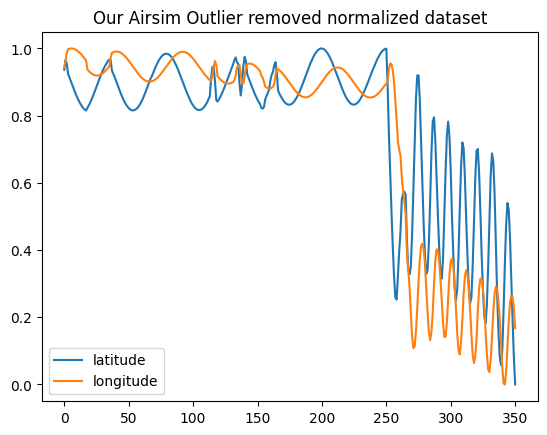

In [ ]:
plt.title("Our Airsim Outlier removed normalized dataset")
plt.plot(lats_sim_arr, label = 'latitude')
plt.plot(long_sim_arr, label = 'longitude')
plt.legend(loc = 'lower left')

In [ ]:
total_length = 300
lat_new = lat_new[0:total_length]
long_new = long_new[0:total_length]
real_world = np.hstack((lat_new,long_new))

lats_sim_arr_new  = lats_sim_arr[0:total_length]
long_sim_arr_new  = long_sim_arr[0:total_length]
sim_world = np.hstack((lats_sim_arr_new,long_sim_arr_new))

Text(0.5, 1.0, 'Comparison of GPS values')

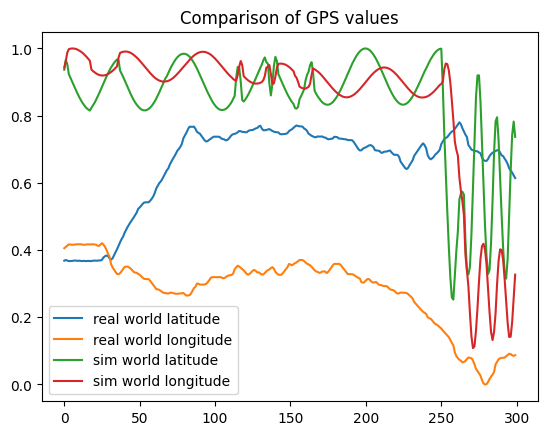

In [ ]:
plt.plot(real_world, label = ["real world latitude","real world longitude"])
plt.plot(sim_world, label = ["sim world latitude","sim world longitude"])
plt.legend(loc = "lower left")
plt.title('Comparison of GPS values')

In [ ]:
inputs = []
outputs = []

In [ ]:
import math

look_back = 10
x = sim_world

for i in range (len(x)-1):
    start = 0
    for j in range (len(x) - look_back):
        stop = start + look_back
        
        input = x[start:stop]
        #output = y[i][mid_value+start]
        output = 1
        start += 1
        inputs.append(input)
        outputs.append(output)
    
        #print('input', input)
        #print('output', output)
        #print('start', start)
        #print(y[0][0:5])
        


In [ ]:
inputs = np.array(inputs)
outputs= np.array(outputs)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( inputs, outputs, test_size=0.5, shuffle= True, random_state=42)

In [ ]:
# helps in text preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# helps in model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError, sparse_categorical_crossentropy, categorical_crossentropy
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsolutePercentageError, SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

import pandas as pd

# split data into train and test set
from sklearn.model_selection import train_test_split

import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:


model1 = Sequential()
model1.add(InputLayer((10, 2)))
model1.add(GRU(100, activation = 'tanh', return_sequences = True))
model1.add(GRU(80, activation = 'tanh',  dropout = 0.9))
model1.add(tf.keras.layers.Dropout(0.8))
model1.add(Dense(80, activation  = 'relu'))
model1.add(tf.keras.layers.Dropout(0.8))
model1.add(Dense(4, activation = 'Softmax'))
#model1.add(Dense(39, 'linear'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 10, 100)           31200     
                                                                 
 gru_5 (GRU)                 (None, 80)                43680     
                                                                 
 dropout_4 (Dropout)         (None, 80)                0         
                                                                 
 dense_4 (Dense)             (None, 80)                6480      
                                                                 
 dropout_5 (Dropout)         (None, 80)                0         
                                                                 
 dense_5 (Dense)             (None, 4)                 324       
                                                                 
Total params: 81,684
Trainable params: 81,684
Non-trai

In [ ]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy',f1_m,precision_m, recall_m]])

history = model1.fit(X_train, y_train,validation_data=(X_test,y_test), batch_size = 1024,epochs=3)

Epoch 1/3


2023-01-05 14:05:02.811955: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-05 14:05:03.062163: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-05 14:05:03.159434: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-05 14:05:03.331063: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-05 14:05:03.451919: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


85/85 [==============================] - ETA: 0s - loss: 0.5068 - accuracy: 0.7979

2023-01-05 14:05:07.311728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-05 14:05:07.407570: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-05 14:05:07.473455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


85/85 [==============================] - 7s 67ms/step - loss: 0.5068 - accuracy: 0.7979 - val_loss: 0.1654 - val_accuracy: 0.9546
Epoch 2/3
85/85 [==============================] - 5s 56ms/step - loss: 0.1869 - accuracy: 0.9545 - val_loss: 0.1482 - val_accuracy: 0.9563
Epoch 3/3
85/85 [==============================] - 5s 55ms/step - loss: 0.1712 - accuracy: 0.9539 - val_loss: 0.1790 - val_accuracy: 0.9458


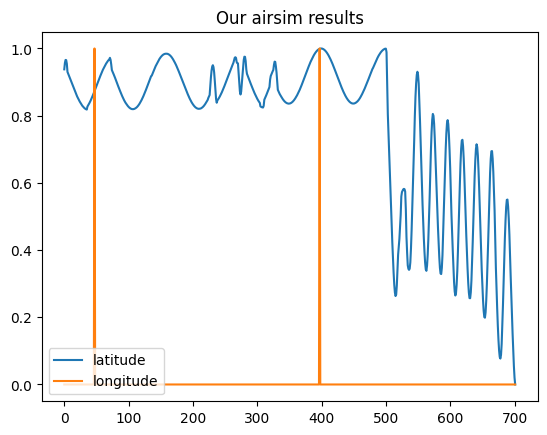

In [ ]:
plt.plot(vir_sc[:,0], label = 'latitude')
plt.plot(vir_sc[:,1], label = 'longitude')
plt.title('Our airsim results')
plt.legend(loc = 'lower left')

In [ ]:
air = pd.read_csv('airsim_data.csv')
air = air.values[:,0:2]
air

array([[47.641468, -122.140165],
       [47.641468, -122.140165],
       [47.641468, -122.140165],
       ...,
       [47.64143222, -122.1401901],
       [47.64143222, -122.1401901],
       [47.64143221, -122.1401901]], dtype=object)

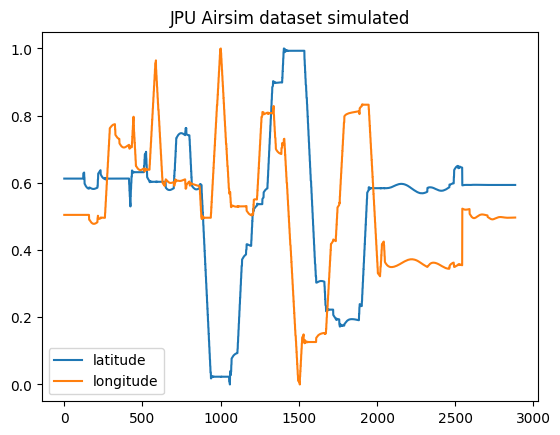

In [ ]:
sc5 = MinMaxScaler()
air_sc = sc5.fit_transform(air)
plt.plot(air_sc[:,0], label= 'latitude')
plt.plot(air_sc[:,1], label= 'longitude')
plt.title("JPU Airsim dataset simulated")
plt.legend(loc = 'lower left')

In [ ]:
data = np.vstack((real_data_array, virtual_data_array))

In [ ]:
from pandas.core.common import random_state
X_train, X_test, y_train, y_test = train_test_split(data[:,:2], data[:,2], test_size=0.01, shuffle = False, random_state = 1)

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
n_input = 10
n_features = 2
generator = TimeseriesGenerator(X_train, y_train, length = 10, batch_size=1, shuffle=False)
#generator2 = TimeseriesGenerator(X_test, y_test, length = 10, batch_size=10)

#generator = TimeseriesGenerator(data[:,:2], data[:,2], length = 10, batch_size=10, shuffle=True)


In [ ]:
counter = 0
for i in generator:
    if counter == 20:
        print(i)
    counter += 1


(array([[[ 0.99999516, -1.00001652],
        [ 0.99999393, -1.00002095],
        [ 0.9999932 , -1.00002359],
        [ 0.99999332, -1.00002314],
        [ 0.99999407, -1.00002046],
        [ 0.99999502, -1.00001703],
        [ 0.99999954, -1.00000041],
        [ 1.00000071, -0.99999629],
        [ 0.99999917, -1.00000177],
        [ 1.0000003 , -0.9999977 ]]]), array([0.]))


In [ ]:
model = keras.models.Sequential()
# model.add(layers.SimpleRNN(32, return_sequences = False, input_shape =(2,1)))
# model.add(layers.LSTM(32, return_sequences = False, input_shape =(2,1)))
model.add(layers.GRU(5, return_sequences = False, input_shape =(1,2)))
#model.add(layers.GRU(32, return_sequences = False))
model.add(layers.Dense(2, activation = 'Softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 5)                 135       
                                                                 
 dense_2 (Dense)             (None, 2)                 12        
                                                                 
Total params: 147
Trainable params: 147
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
, metrics=['accuracy'])

In [ ]:
history = model.fit(generator, epochs = 5, verbose=1, validation_data=generator)

Epoch 1/5


2023-01-04 20:46:44.691006: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-04 20:46:44.821872: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 5/80 [>.............................] - ETA: 1s - loss: 1.2300 - accuracy: 0.0000e+00  

2023-01-04 20:46:44.929833: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


80/80 [==============================] - ETA: 0s - loss: 0.5374 - accuracy: 0.7105

2023-01-04 20:46:48.085277: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-01-04 20:46:48.142261: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


80/80 [==============================] - 5s 48ms/step - loss: 0.5374 - accuracy: 0.7105 - val_loss: 0.3782 - val_accuracy: 0.8761
Epoch 2/5
80/80 [==============================] - 2s 20ms/step - loss: 0.3818 - accuracy: 0.8761 - val_loss: 0.3753 - val_accuracy: 0.8761
Epoch 3/5
80/80 [==============================] - 2s 20ms/step - loss: 0.3799 - accuracy: 0.8761 - val_loss: 0.3753 - val_accuracy: 0.8761
Epoch 4/5
80/80 [==============================] - 2s 21ms/step - loss: 0.3805 - accuracy: 0.8761 - val_loss: 0.3757 - val_accuracy: 0.8761
Epoch 5/5
80/80 [==============================] - 2s 21ms/step - loss: 0.3802 - accuracy: 0.8761 - val_loss: 0.3755 - val_accuracy: 0.8761


In [ ]:
history.history.keys()

In [ ]:
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history["accuracy"], label="training loss")
plt.plot(history.history["val_accuracy"], label="validation loss")
plt.legend()
plt.show()

In [ ]:
scores = model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))